## Observations and Insights 

In [40]:
# Dependencies and Setup
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import os

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mice_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')


# Display the data table for preview
combined_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [41]:
# Checking the number of mice.
combined_mice_df.dtypes
unique_mice = combined_mice_df["Mouse ID"].count()
unique_mice

1893

In [42]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dups = [combined_mice_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
print (dups)



[0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool]


In [43]:
# Optional: Get all the data for the duplicate mouse ID. 



In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mice_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [45]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].count()

1883

## Summary Statistics

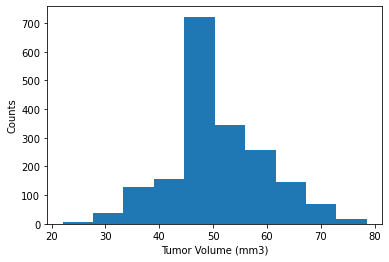

50.44930961960702
48.95136773
0    45.0
dtype: float64
NormaltestResult(statistic=0.7342715775184786, pvalue=0.6927155756692285)
The standard deviation of mice tuors is: 8.91
The SEM value for the mice tumor weight data is 0.20543691976738135
The SEM value for the mice tumor weight sample data is 0.6188689132949142


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
plt.hist(clean_df['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show()
print(clean_df['Tumor Volume (mm3)'].mean())
print(clean_df['Tumor Volume (mm3)'].median())
print(clean_df['Tumor Volume (mm3)'].mode())
print(st.normaltest(clean_df['Tumor Volume (mm3)'].sample(50)))
print(f"The standard deviation of mice tuors is: {round(clean_df['Tumor Volume (mm3)'].std(),2)}")
print(f"The SEM value for the mice tumor weight data is {sem(clean_df['Tumor Volume (mm3)'])}")
sample = clean_df.sample(200)
print(f"The SEM value for the mice tumor weight sample data is {sem(sample['Tumor Volume (mm3)'])}")

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
print(clean_df['Tumor Volume (mm3)'].describe())
# This method produces everything in a single groupby function
grouped = clean_df.groupby('Mouse ID').agg({"Tumor Volume (mm3)": [mean, median, std, variance, sem]}) 
# Using ravel, and a string join, we can create better names for the columns:
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

count    1883.000000
mean       50.449310
std         8.914637
min        22.050126
25%        45.000000
50%        48.951368
75%        56.346321
max        78.567014
Name: Tumor Volume (mm3), dtype: float64


NameError: name 'mean' is not defined

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
